In [50]:
import pandas as pd
import numpy as np

In [51]:
df = pd.read_csv("D:\\ML-DataSets\\train.csv", usecols=['Age', 'Fare', 'Survived'])

In [52]:
df = df.dropna()

In [53]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: xlabel='Fare', ylabel='Density'>

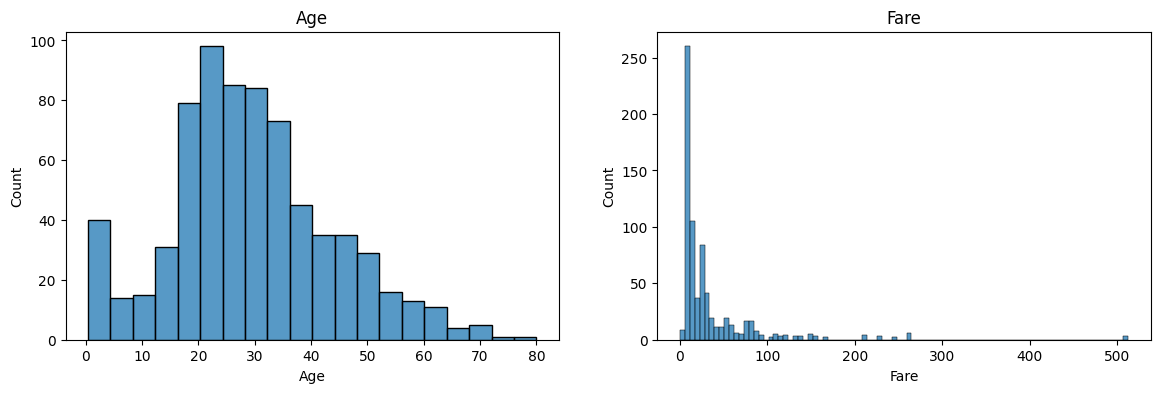

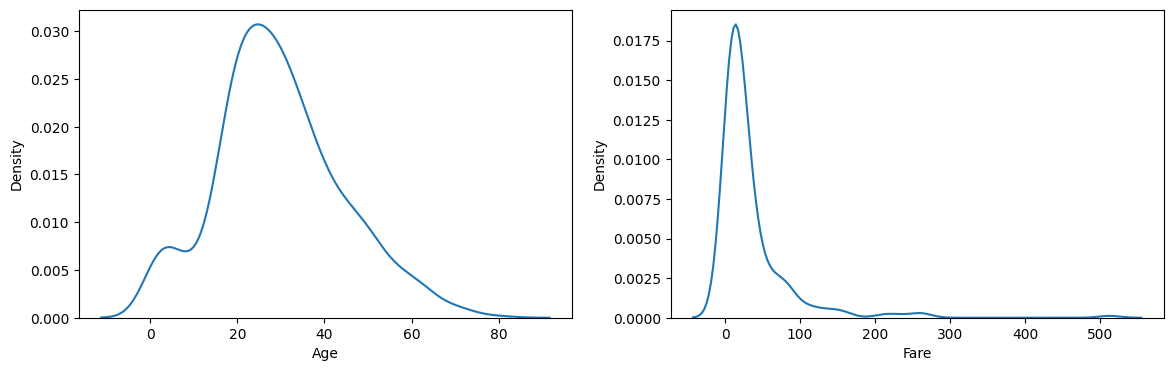

In [54]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['Age'])
plt.title('Age')

plt.subplot(122)
sns.histplot(df['Fare'])
plt.title('Fare')

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(df['Age'])

plt.subplot(122)
sns.kdeplot(df['Fare'])

In [55]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 42)

In [57]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6293706293706294

In [59]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf, x, y, cv=15, scoring='accuracy'))

np.float64(0.630466903073286)

# K-bins Discretization

In [60]:
from sklearn.preprocessing import KBinsDiscretizer

In [61]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins = 15, encode = 'ordinal', strategy = 'quantile')

In [62]:
from sklearn.compose import ColumnTransformer

In [63]:
transformer = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second', kbin_fare, [1])
])

In [65]:
x_train_transformed = transformer.fit_transform(x_train)
x_test_transformed = transformer.transform(x_test)

In [67]:
clf.fit(x_train_transformed, y_train)
y_pred = clf.predict(x_test_transformed)

accuracy_score(y_test, y_pred)

0.6363636363636364

In [70]:
x_transformed = transformer.fit_transform(x)
np.mean(cross_val_score(clf, x_transformed, y, cv = 10, scoring='accuracy'))

np.float64(0.6723004694835681)